In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-notebook')
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import src.scrubbing as scrubbing
import src.evaluation as evalu
from src.roc import plot_roc

/home/soong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/Restaurant_Scores_-_LIVES_Standard.csv')

In [3]:
df7 = scrubbing.scrub_all(df)

/home/soong/galv/capstone/SFeaters/src/scrubbing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_viol['short_violation_id'] = L_vid
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['inspect_date'] = pd.to_datetime(df.inspection_date)
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

## Find out the total number of restaurants in the SF health inspection report

In [4]:
df7.head(1)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11


In [5]:
f1034 = df7['business_address'].unique()

In [6]:
len(list(f1034))

4358

In [13]:
df7['p1_9'] = df7.loc[df7['p1_3'].values + df7['p4_6'].values]

ValueError: cannot reindex from a duplicate axis

In [15]:
f216 = df7['p1_3'].values

In [16]:
f217 = df7['p4_6'].values

In [17]:
f216 + f217

array([0, 6, 4, ..., 0, 0, 0])

In [18]:
df7['p1_9'] = f216 + f217

In [19]:
df7.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94130,94131,94132,94133,94134,94143,94158,95105,p10_36,p1_9
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,11,0
1,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,...,0,0,0,0,0,0,0,0,13,6
2,79782,Deli 23,2449 23rd St,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,8,4
3,73840,L'acajou Bakery and Cafe,498 09th St Ste. C,San Francisco,CA,94103,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,6,5
4,76437,Sweetheart Cafe,909 Grant Ave,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,12,11


## scatter plots

In [20]:
df7.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'short_violation_id', 'inspect_date', 'p1_3', 'p4_6',
       'p7_9', 'p10_12', 'p13_18', 'p19_24', 'p25_36', 'y_label', '92672',
       '94013', '94014', '94080', '94101', '94102', '94103', '94104', '94105',
       '94107', '94108', '94109', '94110', '94111', '94112', '94114', '94115',
       '94116', '94117', '94118', '94120', '94121', '94122', '94123', '94124',
       '94127', '94129', '94130', '94131', '94132', '94133', '94134', '94143',
       '94158', '95105', 'p10_36', 'p1_9'],
      dtype='object')

In [24]:
num_vars = ['p1_9','p10_12','p13_18','p19_24','p25_36', 'p10_36']

/home/soong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


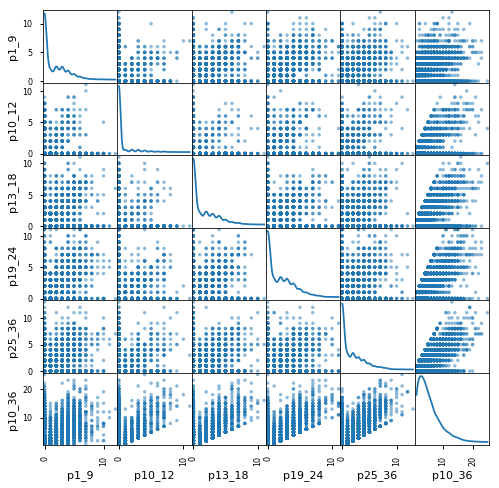

In [25]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df7[num_vars],figsize=(8,8),diagonal = 'kde')